In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [82]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [83]:
df.shape

(962, 2)

In [84]:
# BELOW SHOWS A COUNT OF ALL THE CATEGORIES IN THE DATASET.

df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

<Figure size 1500x500 with 0 Axes>

<Axes: xlabel='count', ylabel='Category'>

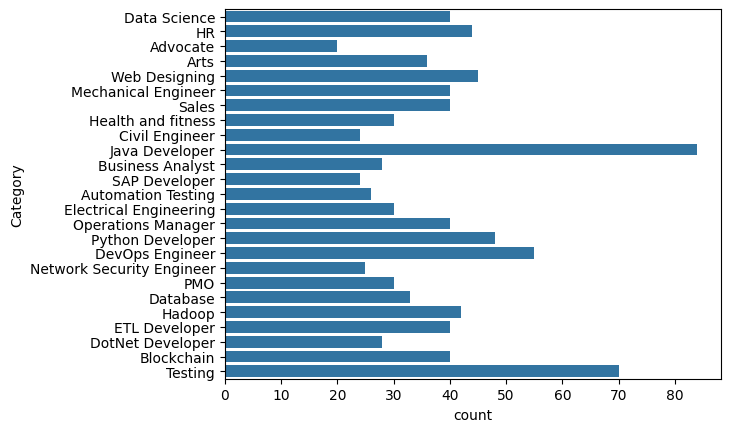

In [85]:
# BELOW SHOWS A BAR CHART WHICH SHOWS THE CATEGORY DISTRIBUTION IN 
# THE DATASET.

plt.figure(figsize=(15,5))
# plt.xticks(rotation=90)
plt.show()
sns.countplot(df['Category'])

([<matplotlib.patches.Wedge at 0x1eca1cddf40>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

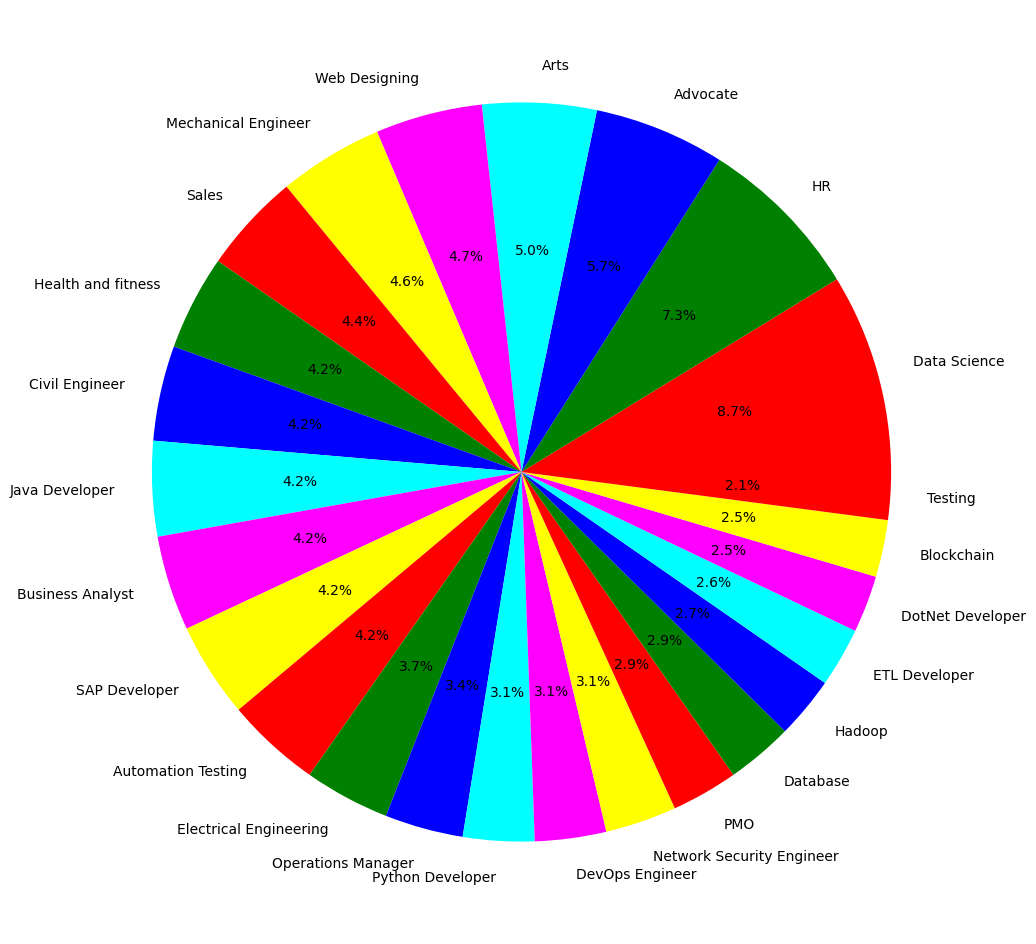

In [86]:
# BELOW SHOWS A PIE CHART WHICH SHOWS THE CATEGORY DISTRIBUTION IN 
# THE DATASET.

counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,12))
plt.pie(counts,labels=labels, autopct='%1.1f%%', colors=['red','green','blue','cyan','magenta','yellow'])

In [87]:
# BELOW FUNCTION IS USED TO GET COMPLETE BIG WORDS SUCH AS "SKILLS",
# "PROGRAMMING", "EXPERIENCE" etc. BELOW IS A FUNCTION CALLER REGULAR
# EXPRESSION WHICH IS USED TO ACHIEVE THIS.

def clean_resume(text):
    clean_text = re.sub("http\S+\s"," ",text)
    clean_text = re.sub("https\S+\s"," ",clean_text)
    clean_text = re.sub("www\S+\s"," ",clean_text)
    clean_text = re.sub("RT|cc"," ",clean_text)
    clean_text = re.sub("#\S+\s"," ",clean_text)
    clean_text = re.sub("@\S+"," ",clean_text)
    
    clean_text = re.sub('[%s]'%re.escape(""" !"#$%&'()
                        *+,-./:;<=>?@[\]^_`{|}~""")," ",clean_text)
    
    clean_text = re.sub(r"[^)x00-\x7f]"," ",clean_text)
    clean_text = re.sub("\s+"," ",clean_text)
    return clean_text

In [88]:
df['Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

In [89]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [90]:
# BELOW WE WILL BE CHANGING WORDS INTO CATEGORICAL VALUES SO THAT IT CAN
# BE USED FOR MACHINE LEARNING ALGORITHMS.
# WE WILL BE USING "LABEL ENCODER" FUNCTION FOR THIS FROM SKLEARN. 

In [91]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df["Category"].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [92]:
tfidf = TfidfVectorizer(sublinear_tf=True, stop_words='english',max_features=1500)
features = tfidf.fit_transform(df['Resume'])
print(features)

  (0, 918)	0.06899078914578759
  (0, 181)	0.058848423700702826
  (0, 77)	0.06328766834077083
  (0, 1192)	0.056177281132389456
  (0, 658)	0.054431218605480856
  (0, 959)	0.06726048777072616
  (0, 1440)	0.04080461724681856
  (0, 1344)	0.05681550781284477
  (0, 484)	0.05909254580523751
  (0, 1452)	0.03330901342845739
  (0, 821)	0.04057118700978642
  (0, 212)	0.05537763014794581
  (0, 213)	0.046485359199680845
  (0, 1227)	0.04489038145594751
  (0, 1266)	0.0664608367862825
  (0, 861)	0.06726048777072616
  (0, 1125)	0.07715873111127622
  (0, 303)	0.07641489061021026
  (0, 623)	0.0664608367862825
  (0, 1443)	0.03203670321153617
  (0, 1222)	0.1806523166473074
  (0, 1167)	0.05518381338393729
  (0, 517)	0.058848423700702826
  (0, 529)	0.05499231783460285
  (0, 413)	0.037111701581442925
  :	:
  (961, 1142)	0.11889174736163466
  (961, 949)	0.07754732797726606
  (961, 95)	0.07165592901692587
  (961, 459)	0.06504538592424662
  (961, 1383)	0.10074720405340566
  (961, 318)	0.0664761860840177
  (961, 1

In [93]:
x_train, x_test, y_train, y_test = train_test_split(features, df["Category"], test_size=0.2, random_state=42)
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(193,)

In [94]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

0.9844559585492227


In [95]:
y_pred = clf.predict(x_test)
print(accuracy_score(y_test, y_pred))
y_pred

0.9844559585492227


array([15, 15, 15, 13, 14, 17, 16,  2,  0, 14, 13, 12, 16, 23, 20,  5,  6,
        4, 10,  9, 19,  1, 10, 23, 23, 21, 22, 22,  2, 12, 18,  1,  8, 24,
       11, 23,  7, 12, 24,  8, 18,  6,  8, 19, 24, 23, 21,  1, 15,  4, 15,
       22, 11,  5, 15, 13,  1, 19,  5, 12, 22, 22, 20, 24, 21, 18, 12, 10,
       10, 20, 10,  8,  9, 21, 17, 21,  0, 17, 16, 14, 15, 11, 11,  8, 20,
        3, 19,  8,  0,  2,  9, 10,  2, 23, 20, 20, 23, 12, 18, 12,  7, 16,
        8, 14, 18,  3, 14, 19, 14, 14, 15, 18,  8,  2, 21, 18, 23, 10, 23,
        5, 11, 15, 12,  3,  5,  3,  7, 12, 19,  8, 20, 19,  3, 15,  9, 19,
        1, 23, 21,  5, 20, 15, 16,  7,  7,  8, 15, 18,  1, 15, 13, 20,  7,
        4, 18, 11,  5, 15,  5, 12,  9, 22, 18, 21,  8, 23,  4, 12, 24, 16,
       15, 22,  8, 22,  3, 16, 23, 23, 12,  7, 16, 18,  5,  3, 18,  8, 23,
       23, 20, 21,  6,  7, 23])

In [96]:
pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))

In [97]:
my_resume = """

John Smith
123 Main Street
Anytown, USA 12345
john.smith@email.com
(123) 456-7890

Objective:
Results-oriented sales professional with 5 years of experience in B2B and B2C sales. 
Proven track record of exceeding sales targets and building strong relationships with clients. 
Seeking a challenging sales position where I can leverage my skills to drive revenue growth 
and contribute to the success of the company.

Education:
Bachelor of Business Administration (BBA)
ABC University, Anytown, USA
Graduated: May 2015

Skills:
- Strong communication and interpersonal skills
- Expertise in prospecting, negotiating, and closing sales deals
- Ability to understand customer needs and provide tailored solutions
- Proficient in CRM software such as Salesforce and HubSpot
- Excellent time management and organizational skills
- Experience in sales forecasting and pipeline management

Experience:
Sales Representative
XYZ Corporation, Anytown, USA
January 2018 - Present
- Prospected and acquired new clients through cold calling, networking, and referrals
- Conducted product demonstrations and presentations to potential customers
- Negotiated pricing and terms of sale to meet customer needs and maximize revenue
- Managed sales pipeline and CRM database to track leads and opportunities
- Collaborated with cross-functional teams to ensure customer satisfaction and retention

Sales Associate
123 Retail Store, Anytown, USA
June 2015 - December 2017
- Provided exceptional customer service to clients in a retail environment
- Assisted customers in selecting products and provided product knowledge
- Processed sales transactions accurately and efficiently
- Maintained a clean and organized store environment
- Achieved and exceeded sales targets on a consistent basis

Projects:
- Developed and implemented a customer referral program that resulted in a 20% increase 
in new customer acquisition within six months
- Collaborated with marketing team to create targeted email campaigns that generated 
a 15% increase in sales revenue

Certifications:
- Certified Sales Professional (CSP)
- SalesForce Certified Administrator

References:
Available upon request

"""


In [98]:
# clf = pickle.load(open('model.pkl', 'rb'))
# cleaned_resume = clean_resume(my_resume)
# input_features = tfidf.transform([cleaned_resume])
# prediction_id = clf.predict(input_features)[0]

# # Map category ID to category name
# category_mapping = {
#     15: "Java Developer",
#     23: "Testing",
#     8: "DevOps Engineer",
#     20: "Python Developer",
#     24: "Web Designing",
#     12: "HR",
#     13: "Hadoop",
#     3: "Blockchain",
#     10: "ETL Developer",
#     18: "Operations Manager",
#     6: "Data Science",
#     22: "Sales",
#     16: "Mechanical Engineer",
#     1: "Arts",
#     7: "Database",
#     11: "Electrical Engineering",
#     14: "Health and fitness",
#     19: "PMO",
#     4: "Business Analyst",
#     9: "DotNet Developer",
#     2: "Automation Testing",
#     17: "Network Security Engineer",
#     21: "SAP Developer",
#     5: "Civil Engineer",
#     0: "Advocate",
# }

# category_name = category_mapping.get(prediction_id, "Unknown")
# print("Predicted Category:", category_name)
# print(prediction_id)





# Load the enhanced model
enhanced_clf = pickle.load(open('model.pkl', 'rb'))
# Load the TfidfVectorizer used for feature extraction during training
tfidf = pickle.load(open('tfidf.pkl', 'rb'))

# Clean the resume (same as before)
def clean_resume(text):
    # Your cleaning logic here
    cleaned_text = re.sub("http\S+\s"," ",text)
    cleaned_text = re.sub("https\S+\s"," ",cleaned_text)
    cleaned_text = re.sub("www\S+\s"," ",cleaned_text)
    cleaned_text = re.sub("RT|cc"," ",cleaned_text)
    cleaned_text = re.sub("#\S+\s"," ",cleaned_text)
    cleaned_text = re.sub("@\S+"," ",cleaned_text)
    
    cleaned_text = re.sub('[%s]'%re.escape(""" !"#$%&'()
                        *+,-./:;<=>?@[\]^_`{|}~""")," ",cleaned_text)
    
    cleaned_text = re.sub(r"[^)x00-\x7f]"," ",cleaned_text)
    cleaned_text = re.sub("\s+"," ",cleaned_text)
    return cleaned_text

# Clean the resume
cleaned_resume = clean_resume(my_resume)

# Transform the cleaned resume text into features
input_features = tfidf.transform([cleaned_resume])

# Predict the category
enhanced_prediction_id = enhanced_clf.predict(input_features)[0]

# # Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

# Get the category name
category_name = category_mapping.get(enhanced_prediction_id, "Unknown")

# Print the results
print("Predicted Category:", category_name)

Predicted Category: Sales
